In [1]:
!pip install sentencepiece
!pip install tf_sentencepiece

     |████████████████████████████████| 1.0MB 3.4MB/s 
     |████████████████████████████████| 2.8MB 3.5MB/s 


In [2]:
!pip install fastai==1.0.52

     |████████████████████████████████| 225kB 3.5MB/s 
  Found existing installation: fastai 1.0.54
    Uninstalling fastai-1.0.54:
      Successfully uninstalled fastai-1.0.54


In [0]:
from fastai import *
from fastai.text import *

import re
import sentencepiece as spm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
subsets=aa/'subsets'

### Set Data(no rerun)

In [0]:
df = pd.read_csv(news/'full_doc.csv') ## THE FULL NEWS DATASET

In [0]:
len(df)

95855

In [0]:
df['text'].apply(lambda x: len(str(x).split())).sum() #total words

28533646

In [0]:
len(set(' '.join(str(y) for y in df['text'].values).split())) #unique words

836509

In [0]:
df.head()

,label,text,is_valid
0,opinion,উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বি...,False
1,opinion,জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তা...,False
2,opinion,একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখ...,False
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি ...,False
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘান...,False


In [0]:
def sent(s):
  global ls
  s = s.split('।')
  s = [ss+'।' for ss in s]
  ls = ls + s

In [0]:
ls =[]
df['text'].apply(sent);

In [0]:
len(ls)

2025412

In [0]:
ls[:10]

['উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি পরীক্ষার্থীদের শান্তিপূর্ণভাবে পরীক্ষা দিতে দিন।',
 ' দয়া করে কোনো হটকারী ঘটনা ঘটাবেন না।',
 ' “আমি স্পষ্ট ভাষায় জানিয়ে দিতে চাই- দেশের যে কোনো স্থানে আমাদের একজন পরীক্ষার্থীরও যদি কোনো ক্ষতি হয়, তার দায়দায়িত্ব আপনাদেরকেই বহন করতে হবে।',
 ' মানুষ আপনাদের ক্ষমা করবে না।',
 '” গত ৫ জানুয়ারি থেকে সারা দেশে টানা অবরোধ চালিয়ে আসা বিএনপি জোট ফেব্রুয়ারি ও মার্চের বেশিরভাগ সময় ছুটি ছাড়া প্রতিদিনই হরতাল করে এসেছে।',
 ' বিএনপি জোটের অবরোধ-হরতালে চলতি এসএসসি ও সমমানের সবগুলো অর্থাৎ, ১৬ দিনের ৩৬৮টি পরীক্ষা পেছাতে বাধ্য হয় শিক্ষা মন্ত্রণালয়।',
 ' পরীক্ষাগুলো নেওয়া হয় ছুটির দিনে, শুক্র ও শনিবার।',
 ' তবে এ ধরনের রাজনৈতিক কর্মসূচির কারণে যে এইচএসসি পরীক্ষা পেছানো হবে না তা আগেই জানিয়ে রেখেছেন শিক্ষামন্ত্রী।',
 ' ফাইল ছবি বিবৃতিতে নাহিদ বলেন, “সংকটের মধ্যে এসএসসি পরীক্ষা শেষ হতে না হতেই এইচএসসি পরীক্ষা শুরু হচ্ছে।',
 ' জাতির দুর্ভাগ্য যে, একটি রাজনৈতিক জো

In [0]:
sv = pd.DataFrame({'text':ls})
sv.to_csv(news/'sp_sents.csv',index=False)

In [0]:
sv = pd.read_csv(news/'sp_sents.csv')
sv.head()

,text
0,উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বি...
1,দয়া করে কোনো হটকারী ঘটনা ঘটাবেন না।
2,“আমি স্পষ্ট ভাষায় জানিয়ে দিতে চাই- দেশের যে ক...
3,মানুষ আপনাদের ক্ষমা করবে না।
4,” গত ৫ জানুয়ারি থেকে সারা দেশে টানা অবরোধ চালি...


In [0]:
len(sv)

2025412

In [0]:
defaults.text_pre_rules

[<function fastai.text.transform.fix_html>,
 <function fastai.text.transform.replace_rep>,
 <function fastai.text.transform.replace_wrep>,
 <function fastai.text.transform.spec_add_spaces>,
 <function fastai.text.transform.rm_useless_spaces>]

In [0]:
for rule in defaults.text_pre_rules:
    sv['text']=sv['text'].apply(lambda x: rule(str(x)))

In [0]:
sv['text'] = sv['text'].apply(lambda x: '<s>'+x+'</s>');

In [0]:
sv.head(1)['text'][0]

'<s>উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি পরীক্ষার্থীদের শান্তিপূর্ণভাবে পরীক্ষা দিতে দিন।</s>'

In [0]:
file = 'formatted_sp_sents.csv'

In [0]:
## Saving the file
sv.to_csv(news/file,index=False)

### load and save to current dir(no rerun-for sp)

In [0]:
file = 'formatted_sp_sents.csv'
sv = pd.read_csv(news/file);
sv.to_csv(file,index=False) # to save in current directory

## Training

In [0]:
vocab_size = 30000
model_prefix = 'sp'

In [0]:
spm.SentencePieceTrainer.Train(f'--input={file}'\
                               f' --model_prefix={model_prefix}'\
                               f' --vocab_size={vocab_size}')
#                               f'--unk_piece={UNK} --bos_piece={BOS} --eos_id=-1 --pad_piece={PAD}')

In [13]:
#Head of the Vocab file: Line nums indicate index of vocab
!head -n10 {model_prefix}.vocab | nl

     1	<unk>	0
     2	<s>	0
     3	</s>	0
     4	▁	-1.92809
     5	।	-3.08075
     6	,	-3.75831
     7	"	-3.82833
     8	▁"	-4.22803
     9	▁ও	-4.91756
    10	র	-4.94756


In [11]:
## load up the Processor
sp = spm.SentencePieceProcessor()
sp.load(f'{model_prefix}.model')

True

In [0]:
itos = [] #{}
with open(f'{model_prefix}.vocab','r') as f:
    for line_num,line in enumerate(f):
        itos.append(line.split("\t")[0])

In [13]:
len(itos)

30000

In [14]:
itos[:5], itos[-5:]

(['<unk>', '<s>', '</s>', '▁', '।'],
 ['ইমরুল', '▁কামরাঙ্গীর', '▁whe', '▁অভ্যন্তরী', '/'])

In [0]:
class SPTokenizer(BaseTokenizer):
    "Wrapper around a SentncePiece tokenizer to make it a `BaseTokenizer`."
    def __init__(self, model_prefix:str):
        self.tok = spm.SentencePieceProcessor()
        self.tok.load(f'{model_prefix}.model')

    def tokenizer(self, t:str) -> List[str]:
        return self.tok.EncodeAsPieces(t)
    
class CustomTokenizer():
    '''Wrapper for SentencePiece toeknizer to fit into Fast.ai V1'''
    def __init__(self,tok_func:Callable,model_prefix:str, pre_rules:ListRules=None):
        self.tok_func,self.model_prefix = tok_func,model_prefix
        self.pre_rules  = ifnone(pre_rules,  defaults.text_pre_rules )
        
    def __repr__(self) -> str:
        res = f'Tokenizer {self.tok_func.__name__} using `{self.model_prefix}` model with the following rules:\n'
        for rule in self.pre_rules: res += f' - {rule.__name__}\n'
        return res        

    def process_text(self, t:str,tok:BaseTokenizer) -> List[str]:
        "Processe one text `t` with tokenizer `tok`."
        for rule in self.pre_rules: t = rule(t)  
        toks = tok.tokenizer(t)
        #post rules?
        return toks 
    
    def _process_all_1(self,texts:Collection[str]) -> List[List[str]]:
        'Process a list of `texts` in one process'
        tok = self.tok_func(self.model_prefix)
        return [self.process_text(t,tok) for t in texts]
                                                                     
    def process_all(self, texts:Collection[str]) -> List[List[str]]: 
        "Process a list of `texts`."                                 
        return self._process_all_1(texts)

In [0]:
#setup Vocab object for use in LM
sp_vocab = Vocab(itos)

In [0]:
mycust_tok = CustomTokenizer(SPTokenizer,model_prefix)

### News LM (ULM)

In [0]:
bs = 32
bptt = 70

In [0]:
data_lm = TextLMDataBunch.from_csv(news , 'full_doc.csv', bs=bs , bptt=bptt,tokenizer=mycust_tok, vocab=sp_vocab)
data_lm.save('news_subword.pkl')

In [0]:
data_lm = load_data(news, 'news_subword.pkl',bs=bs)

In [0]:
len(data_lm.train_dl.vocab.itos)

30000

In [0]:
data_lm.show_batch()

idx,text
0,"▁ জাগ ানোর ▁মতো ▁পরিবর্তন ▁নেই । ▁ইতালি ▁কোচ ▁রবার্তো ▁ড োনা ডো নি ▁শুধু ▁তার ▁চূড়ান্ত ▁দলে ▁রাখেননি ▁ফিওরেন্টিনা র ▁মিডফিল্ডার ▁রি কার্ড ো ▁ মন্ট োলি ভো কে । ▁জার্মান ▁কোচ ▁জোয়া কিম ▁ লো উয়ে র ▁চূড়ান্ত ▁বিবেচনা ▁থেকে ▁বাদ ▁পড়েছেন ▁আন্তর্জাতিক ▁ফুটবলে ▁অনভিজ্ঞ ▁তিন ▁খেলোয়াড় ▁মার্কো ▁মা রিন , ▁জা র্ম ে ইন ▁জোন্স ▁ও ▁ প্যাট্রিক ▁ হেম স । ▁ওদিকে ▁ডাচ ▁কোচ ▁মার্কো ▁ফন"
1,"▁থেকেই ▁বাংলা ▁ভাষা ▁ও ▁সংস্কৃতির ▁পাশাপাশি ▁বাঙালিদের ▁প্রতি ▁গভীর ▁আগ্রহের ▁শুরু । ▁অধ্যাপক ▁তো মি ও ▁মি জো কা মি ▁বলেন , ▁“ একাত্তরের ▁সময় ▁আমি ▁ও সাকা ▁বিশ্ববিদ্যালয়ে ▁অধ্যাপনা ▁করছিলাম । ওই ▁সময় ▁পত্র - পত্রিকা ▁আর ▁বিশ্বভারতী র ▁কিছু ▁বন্ধুদের ▁কাছ ▁থেকে ▁বাঙালিদের ▁উপর ▁পাকিস্তানের ▁শোষণ ▁আর ▁নির্যাতনের ▁কথা ▁শুনে ▁নিজেকে ▁সামলাতে ▁পারিনি । ” ▁“ বাংলাদেশের ▁স্বাধীনতার ▁সমর্থনে ▁আমি ▁জাপানের ▁বিভিন্ন ▁পত্র - পত্রিকায় ▁লেখা লি খি"
2,"▁ com ments ▁on ▁the ▁ pro f ile ▁of ▁a ▁us er . ▁W hich ▁of ▁the ▁above ▁state ments ▁is ▁/ ▁are ▁correct ? ▁i . ▁A ▁and ▁B ▁ii . ▁B ▁and ▁C ▁iii . ▁A ▁and ▁C ▁iv . ▁B ▁ f . ▁"" The y ▁can ▁also ▁express ▁their ▁ op in ion ▁or ▁vi ew s ▁on ▁their ▁ pro fi les ▁through ▁"
3,"▁ভোট ▁চুরির ▁সঙ্গে ▁সেনাবাহিনী ▁জড়িত ▁থাকে ▁না । ▁নির্বাচন ▁কমিশনের ▁চাহিদা ▁অনুযায়ী ▁সেনা ▁মোতায়েন ে ▁সহযোগিতা ▁না ▁করার ▁অপরাধ বোধ ▁থেকেই ▁হয়তো ▁প্রধামন্ত্রী ▁এখন ▁আব োল - তাব োল ▁বলছেন , "" ▁যোগ ▁করেন ▁এই ▁বিএনপি ▁নেতা । ▁সাবেক ▁সাংসদ ▁মোশাররফ ▁বলেন , ▁"" সংবিধানের ▁১২৬ ▁অনুচ্ছেদ ▁অনুযায়ী ▁সরকার ▁নির্বাচন ▁কমিশনকে ▁সেনা ▁বাহিনী ▁দিতে ▁বাধ্য । ▁নির্বাচন ▁কমিশনের ▁অনুরোধ ▁অনুযায়ী ▁নারায়ণগঞ্জে ▁সেনা ▁মোতায়েন ▁না ▁করে ▁প্রধানমন্ত্রী ▁সংবিধান ▁লঙ্ঘন ▁করেছেন ।"
4,"▁ অবসরের ▁কারণ ▁নয় । ▁আমি ▁একজন ▁ধারাভাষ্যকার , ▁কোচ ▁বা ▁আম্পায়ার ▁হতে ▁পারবো ▁না । ▁কিন্তু ▁আমি ▁ভালো ▁বল ▁করতে ▁ও ▁উইকেট ▁তুলে ▁নিতে ▁পারবো । ▁তাই ▁অর্থ কেই ▁আমার ▁সিদ্ধান্তের ▁মূল ▁কারণ ▁বলা টা ▁অবিচার ▁হবে । ▁শ্রীলঙ্কার ▁হয়ে ▁মাত্র ▁৩০ ▁টেস্ট ▁খেলা ▁মালিঙ্গা ▁১০০ ▁( ১০ ১ ) ▁ টি ▁উইকেট ▁নিয়েছেন । ▁তার ▁আগে ▁ম ুত্তিয়া ▁মুরালিধরন ▁ও ▁চা মি ন্দা ▁ ভাস ই ▁শুধু ▁এই"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


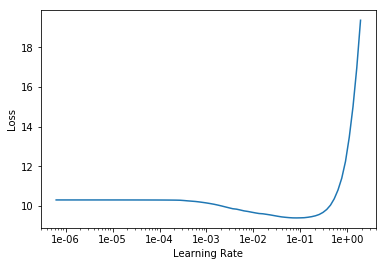

In [0]:
learn.lr_find();
learn.recorder.plot();

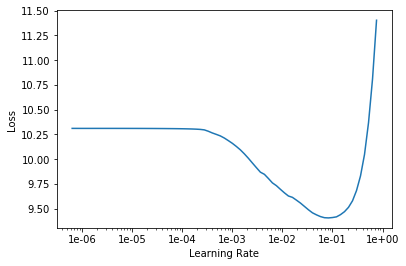

In [0]:
learn.recorder.plot(skip_end=10)

##### epochs

epoch,train_loss,valid_loss,accuracy,time
0,4.638430,4.452888,0.292754,52:56


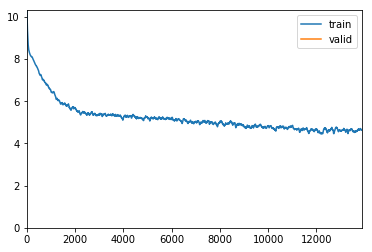

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm')

epoch,train_loss,valid_loss,accuracy,time
0,4.523597,4.313521,0.305719,52:56


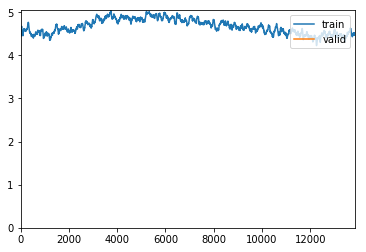

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_2')

epoch,train_loss,valid_loss,accuracy,time
0,4.327793,4.245755,0.311596,52:55


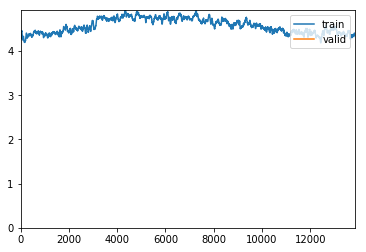

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_3')

epoch,train_loss,valid_loss,accuracy,time
0,4.267126,4.204876,0.315610,52:53


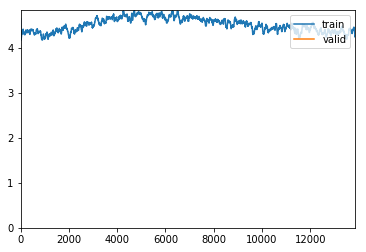

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_4')

epoch,train_loss,valid_loss,accuracy,time
0,4.326856,4.175828,0.318517,52:53


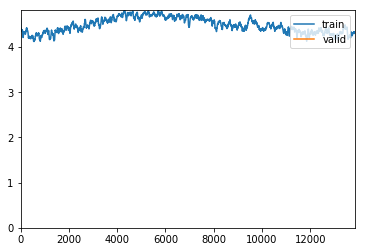

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_5')

epoch,train_loss,valid_loss,accuracy,time
0,4.323741,4.154680,0.320393,52:50


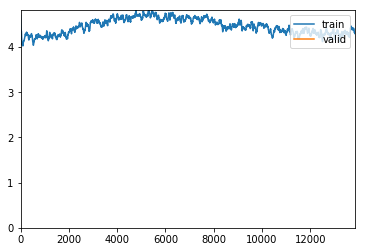

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_6')

epoch,train_loss,valid_loss,accuracy,time
0,4.336947,4.139998,0.321645,52:38


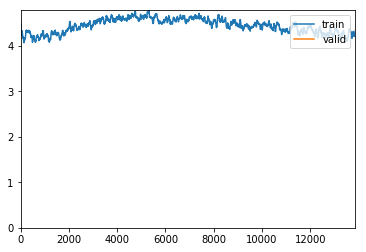

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_7')

epoch,train_loss,valid_loss,accuracy,time
0,4.246393,4.128552,0.322756,52:42


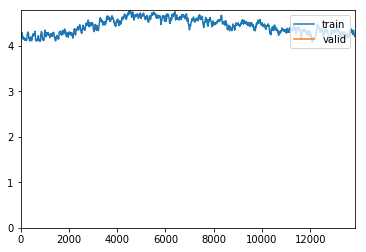

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_8')

##### test

In [0]:
TEXT ='তিনি' #তিনি মারা গেছেন মাস তিনেক
N_WORDS = 100
N_SENTENCES = 5
for _ in range(N_SENTENCES):
  s = learn.predict(TEXT, N_WORDS, temperature=0.75)
  ret = TEXT
  for i in range(len(TEXT)+1,len(s)):
    if(s[i-1]==' '):
      ret += s[i]
  print(ret)

তিনি▁,▁বি▁ক▁▁▁ছ।▁▁▁▁▁▁।”▁জই▁▁▁▁▁▁,▁▁▁▁,▁▁▁▁▁▁,▁▁।▁▁▁▁▁▁▁▁▁▁▁।▁▁,▁এ▁▁▁বর▁▁।▁▁▁▁▁,▁▁র▁▁▁▁▁▁▁▁।”▁▁▁▁▁▁▁▁▁▁▁
তিনি▁▁▁▁▁▁▁▁।▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,▁▁▁▁▁।▁▁▁▁▁▁▁ক▁▁▁▁▁,▁প▁▁▁▁▁▁।▁▁▁▁▁▁।▁’৯▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁।”▁▁▁▁▁▁▁▁▁▁▁▁,▁▁▁▁,
তিনি▁,▁ম,▁চক▁▁▁▁▁▁।▁▁▁।▁▁▁হ▁▁▁▁অ।▁,▁,▁▁▁▁▁▁।”▁▁▁▁▁▁▁▁▁।▁▁▁▁▁▁ম▁▁জ▁’র▁▁▁▁▁▁।▁ত▁▁▁ই▁-ত▁,▁▁▁▁▁জ-ন▁▁▁▁▁।”▁স▁
তিনি▁,▁আ▁▁।▁,▁▁▁▁▁▁▁।▁▁▁।”▁আ▁▁,▁▁▁র▁▁।▁▁হব▁।▁▁▁▁▁▁▁▁,▁▁।▁▁▁▁▁স▁▁▁▁▁▁▁▁▁▁▁▁▁▁।▁▁▁▁▁▁▁▁▁▁▁▁,▁আ▁▁▁▁▁▁।▁দ▁▁▁
তিনি▁,▁▁-▁▁▁।”▁▁▁▁▁▁▁ে▁▁▁▁▁▁।▁▁,▁▁▁▁▁▁▁▁▁▁।▁▁▁▁▁▁▁▁।▁-জ▁▁▁▁▁▁▁।▁ত▁▁▁▁▁▁▁▁▁▁▁।▁▁▁▁।”▁ত▁খ)▁▁▁▁?▁▁▁▁▁▁▁।▁▁▁


**https://forums.fast.ai/t/adding-sentencepiecetokenizer-to-fastai-text-data/29864/12?u=tanny411**

epoch,train_loss,valid_loss,accuracy,time
0,4.573126,4.461622,0.289000,52:11
1,4.183505,4.050094,0.330946,52:16


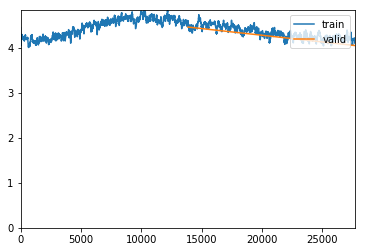

In [0]:
learn.load('news_subword_lm_8')
learn.fit_one_cycle(2, 1e-2)
learn.save('news_subword_lm_10')

epoch,train_loss,valid_loss,accuracy,time
0,4.361882,4.099645,0.325607,52:26


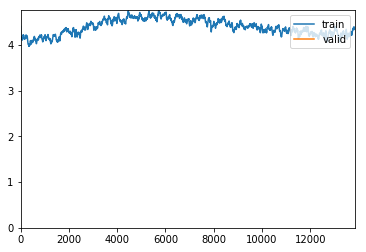

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_subword_lm_11')

epoch,train_loss,valid_loss,accuracy,time
0,4.087220,4.026862,0.333267,1:39:23


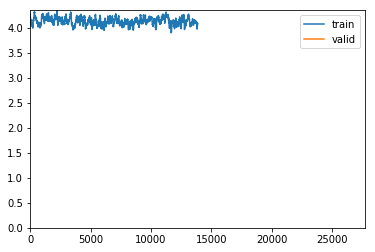

Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('news_subword_lm_11')
learn.fit_one_cycle(2, 1e-3)
learn.save('news_subword_lm_13')

epoch,train_loss,valid_loss,accuracy,time
0,4.102897,3.957351,0.341504,51:58


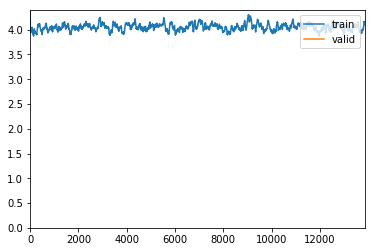

In [0]:
learn.load('news_subword_lm_13')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_14')

epoch,train_loss,valid_loss,accuracy,time
0,3.989565,3.963389,0.340245,1:41:11


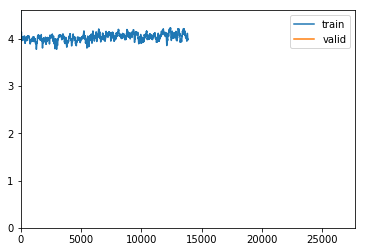

Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('news_subword_lm_14')
learn.fit_one_cycle(2, 1e-3)
learn.save('news_subword_lm_15') #16 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.929806,3.906352,0.347395,54:30


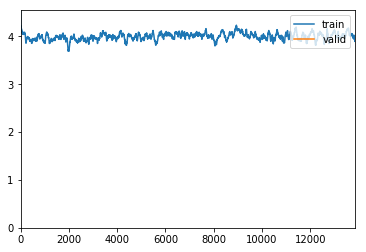

In [0]:
learn.load('news_subword_lm_15')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_17') #17 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.880428,3.892335,0.348920,1:41:31


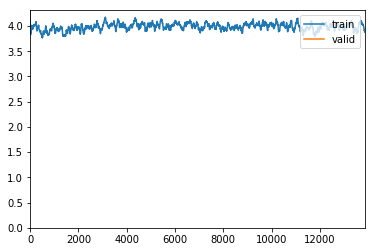

In [0]:
learn.load('news_subword_lm_17')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_18') #18 epochs

In [0]:
learn.load('news_subword_lm_18')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_19') #19 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.948228,3.880847,0.350500,1:41:55


In [0]:
learn.load('news_subword_lm_19')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_20') #20 epochs

epoch,train_loss,valid_loss,accuracy,time
0,4.061941,3.870568,0.351630,53:17


In [0]:
learn.load('news_subword_lm_20')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_21') #21 epochs

In [0]:
learn.load('news_subword_lm_21')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_22') #22 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.927883,3.847154,0.354204,1:41:25


In [0]:
learn.load('news_subword_lm_22')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_23') #23 epochs

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,3.895573,3.837039,0.355132,1:41:37


In [0]:
learn.load('news_subword_lm_23')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_24') #24 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.823587,3.828969,0.356190,51:56


In [0]:
learn.load('news_subword_lm_24')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_25') #25 epochs

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,3.905692,3.818139,0.357404,51:56


In [0]:
learn.load('news_subword_lm_25')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_26') #26 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.898668,3.811394,0.358232,51:56


In [0]:
learn.load('news_subword_lm_26')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_27') #27 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.902276,3.801767,0.359174,51:56


In [0]:
learn.load('news_subword_lm_27')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_28') #28 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.850008,3.794896,0.359933,51:57


In [0]:
learn.load('news_subword_lm_28')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_29') #29 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.883672,3.788591,0.360675,51:57


In [0]:
learn.load('news_subword_lm_29')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_30') #30 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.925341,3.781647,0.361456,51:56


In [0]:
learn.load('news_subword_lm_30')
learn.fit_one_cycle(1, 1e-3)
learn.save('news_subword_lm_31') #31 epochs

epoch,train_loss,valid_loss,accuracy,time
0,3.830563,3.775298,0.362159,51:57


## Utils

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds, targets

## BAAD6 Dataset fine-tuning and classification

### LM Tuning

In [0]:
data_lm_AA = TextLMDataBunch.from_csv(aa2, 'ulm_train.csv', bs=bs , bptt=bptt,tokenizer=mycust_tok, vocab=sp_vocab)
data_lm_AA.save('bhai_AA_subword_lm.pkl')

In [0]:
data_lm_AA.show_batch()

idx,text
0,"গুলো ▁প্রথমে ▁জানতে ▁চায় ▁ আচ্ছা , ' হি মি ▁বলে ▁কি ▁কেউ ▁সত্যি ▁আছে ? আর ▁অনেকে ▁জানতে ▁চায় ▁কতদিন ▁হয়ে ▁গেল ▁কেন ▁' হি মি ' কে ▁নিয়ে ▁কিছু ▁লেখা ▁হচ্ছে ▁না ? আমি ▁কারো ▁প্রশ্নের ▁ ঊ ও র ▁দেই ▁না , ছোট ▁করে ▁একটু ▁হেসে ▁দেই ▁শুধু । ) এক ▁আশ্চর্য ▁সুন্দর ▁মেয়ের ▁নাম ▁' হি মি ' । মনের ▁ভেতর ▁একসঙ্গে ▁খেলা ▁করে ▁তার ▁প্র"
1,"▁হরতালের ▁মাঝে ▁গত ▁প্রায় ▁দুই ▁মাস ▁ধরে ▁সারা ▁দেশে ▁যে ▁হারে ▁পেট্রলবোমা ▁হামলা ▁হয়েছে ▁তার ▁তুলনায় ▁রাজধানী ▁অনেকটাই ▁নিরাপদ ▁ছিল । ▁তবে ▁গত ▁তিন ▁দিনে ▁ঢাকায় ▁যাত্রীবাহী ▁বাসে ▁পেট্রলবোমা ▁হামলা ▁ও ▁নাশকতার ▁ঘটনা ▁বেড়েছে । ▁এতে ▁দগ্ধ ▁হয়েছে ▁নিরীহ ▁মানুষ । ▁ঢাকায় ▁এর ▁আগেও ▁পেট্রলবোমা ▁হামলার ▁ঘটনা ▁ঘটলেও ▁ইদানীং ▁এর ▁মাত্রা ▁বেড়ে ▁গেছে ▁বলেই ▁ঘটনাপ্রবাহ ▁সাক্ষ্য ▁দেয় । ▁পেট্রলবোমা র ▁পাশাপাশি ▁বোমা , ▁ককটেল ▁ও ▁আগুন ▁দেওয়ার ▁ঘটনাও ▁বেড়ে ▁গেছে"
2,"▁দেখবো ▁না , ▁তা ▁কি ▁হয় ? ▁কিন্তু ▁এই ▁প্রবল ▁প্রকৃতি প্রেম ের ▁মাশুল ও ▁আমাকে ই ▁দিতে ▁হয় , ▁একেবারে ▁ঘন্টা খানেক ের ▁পথ ▁পিছিয়ে ▁পড়তে ▁হয় ▁অন্যদের ▁চেয়ে । ▁কারণ , ▁আমাদের ▁দলের ▁অন্যদের ▁প্রকৃতি প্রেম ▁আমার ▁চেয়ে ▁খুব ▁একটা ▁কম ▁নয় , ▁বরং ▁খানিকটা ▁বেশি ই । ▁তাই ▁চলার ▁ফাঁকে ই ▁তারা ▁ নিস র্গ ের ▁প্রতি ▁দৃষ্টি নৈ বে দ্য ▁দিয়ে ▁অনেকখানি ▁এগিয়ে ▁যান । ▁তাই"
3,"▁হে ! "" ▁আজ ▁পরীক্ষা ▁দিয়েছি ▁সব শ ুদ্ধ ু ▁আটজন । ▁ক্লাসের ▁অর্ধেকের ও ▁বেশি ▁ছেলে পি লে ▁শেষ ▁পর্যন্ত ▁আর ▁পরীক্ষা ▁দেয়নি । ▁এক্স ট্রা ▁ক্রেডিট ের ▁এটাই ▁মজা , ▁ক্লাস ▁করতে ▁চাইলে ▁করো , ▁পরীক্ষা ▁দিতে ▁হবে ▁এমন ▁কোন ▁কথা ▁নেই । ▁তবে ▁পরীক্ষার ▁জন্যে ▁একবার ▁নিবন্ধন ▁করে ▁পরীক্ষা ▁দিতে ▁বসলে ▁তা ▁পাশ ▁করতেই ▁হবে , ▁নইলে ▁ ভ্যা জাল । ▁২ . ০ ▁পেয়ে ▁মনটা ▁একটু"
4,"▁সংসদে ▁গত ▁বৃহস্পতিবার ▁এ ▁বিষয়ে ▁একটি ▁সিদ্ধান্ত ▁প্রস্তাব ▁সর্বসম্মতিক্রমে ▁পাস ▁হয়েছে । ▁স্বরাষ্ট্র মন্ত্রী ▁সাংবাদিকদের ▁বলেন , ▁"" তারা ▁( যুদ্ধাপরাধী রা ) ▁যাতে ▁বাংলাদেশ ▁ছাড়তে ▁না ▁পারে ▁সে ▁ব্যাপারে ▁সংশ্লিষ্ট ▁কর্তৃপক্ষকে ▁আমরা ▁নির্দেশ ▁দিয়েছি । "" ▁তবে ▁ওই ▁ধরনের ▁সন্দেহভাজন দের ▁কোনো ▁তালিকা ▁প্রস্তুত ▁হয়েছে ▁কি - না ▁সে ▁সম্পর্কে ▁মন্ত্রী ▁কিছু ▁জানাননি । ▁ঢাকা ▁ বিশ্ববিদ্যালয়ের ▁উপাচার্য ▁আ ▁আ ▁ম ▁স ▁আরেফিন ▁সিদ্দিকী ▁বাংলাদেশ ▁আইন ▁সমিতির ▁এ ▁সম্মেলনের"


In [0]:
data_lm_AA=load_data(aa2,'bhai_AA_subword_lm.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(news/'models'/'news_subword_lm_31');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


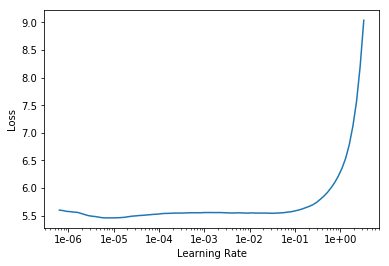

In [52]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

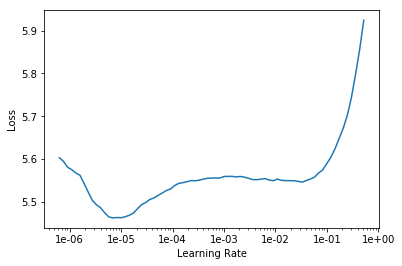

In [53]:
learn.recorder.plot(skip_end=15)

In [54]:
learn.fit_one_cycle(2, 2e-2)
learn.save('bhai_AA_lm_subword_head');

epoch,train_loss,valid_loss,accuracy,time
0,5.752337,5.765594,0.169632,03:14
1,5.193652,5.380138,0.199315,03:20


In [76]:
learn.load('bhai_AA_lm_subword_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 2e-2)
learn.freeze_to(-3)
learn.fit_one_cycle(2, 2e-2)
learn.unfreeze()
learn.fit_one_cycle(4, 2e-2)
learn.save('bhai_AA_lm_subword_body')

epoch,train_loss,valid_loss,accuracy,time
0,5.600430,5.753211,0.171887,03:19
1,5.214345,5.414128,0.198147,03:24


epoch,train_loss,valid_loss,accuracy,time
0,5.614400,5.854876,0.162329,03:41
1,5.138377,5.485198,0.194387,03:41


epoch,train_loss,valid_loss,accuracy,time
0,5.393861,5.818023,0.164286,03:54
1,5.542984,5.780285,0.168132,03:53
2,5.227235,5.526528,0.188980,03:55
3,4.665875,5.451222,0.198894,03:55


In [0]:
learn.save_encoder('bhai_AA_lm_subword_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(aa2, 'ulm_train.csv',tokenizer=mycust_tok, vocab=sp_vocab, bs=bs)
data_clas.save('bhai_AA_subword_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"▁xx b os ▁দেখি তে ▁গ িয়া ছি ▁পর্বত মালা ▁একটু ▁বড় ▁ ... ▁লেখা টা ▁২০০৪ ▁সালের ▁অক্টোবরে ▁লেখা । ▁বছর দু য় েক ▁আগে ▁একাধিকবার ▁অনলাইনে ▁প্রকাশিত । ▁এই ▁লেখা টা ▁একাধিক ▁কারণে ▁আমার ▁প্রিয় । ▁প্রথমত , ▁লেখা টা ▁প্রায় ▁এক ▁আসনে ▁লেখা , ▁মাঝখানে ▁শুধু ▁ঘুমিয়ে ছিলাম ▁একটু । ▁দ্বিতীয়ত , ▁এখন ▁পর্যন্ত ▁এটাই ▁আমার ▁ম্যাগ নাম ▁ও পাস ▁( আয় তন ের ▁দিক ▁থেকে )",hm
"▁xx b os ▁দেখি তে ▁গ িয়া ছি ▁পর্বত মালা ▁একটু ▁বড় ▁ ... ▁লেখা টা ▁২০০৪ ▁সালের ▁অক্টোবরে ▁লেখা । ▁বছর দু য় েক ▁আগে ▁একাধিকবার ▁অনলাইনে ▁প্রকাশিত । ▁এই ▁লেখা টা ▁একাধিক ▁কারণে ▁আমার ▁প্রিয় । ▁প্রথমত , ▁লেখা টা ▁প্রায় ▁এক ▁আসনে ▁লেখা , ▁মাঝখানে ▁শুধু ▁ঘুমিয়ে ছিলাম ▁একটু । ▁দ্বিতীয়ত , ▁এখন ▁পর্যন্ত ▁এটাই ▁আমার ▁ম্যাগ নাম ▁ও পাস ▁( আয় তন ের ▁দিক ▁থেকে )",hm
"▁xx b os ▁আ বাহ ন ▁১ . ▁"" উনি ▁একজন ▁বু জ র ুক ▁ছিলেন । "" ▁শামীম ের ▁কণ্ঠস্বর ে ▁ তাচ্ছিল্য ের ▁কোনো ▁কমতি ▁রইল ো ▁না । ▁সোমা ▁একটু ▁শাসন ▁করার ▁চেষ্টা ▁করলো ▁স্বামীকে , ▁"" নিজের ▁দাদা কে ▁কেউ ▁বু জ র ুক ▁বলে ▁এভাবে ? "" ▁শামীম ▁বারান্দা র ▁কাঠের ▁রেল ি ঙ ে ▁পা ▁তুলে ▁দিয়ে ▁ আয়েশ ▁করে ▁চায় ের ▁কাপে ▁চুমু",hm
"▁xx b os ▁গোয়েন্দা ▁ঝা কানা কা ▁ও ▁অজ্ঞান ▁পার্টি ▁রহস্য ▁এক ▁গোয়েন্দা ▁ঝা কানা কা ▁চোখ ▁গরম ▁করে ▁বললেন , ▁"" এবার ও ▁কি ▁সেবার ের ▁মতো ▁দুই ▁ ল ম্বর ি ▁ কে স ▁নিয়ে ▁হাজির ▁হলেন ▁নাকি ? "" ▁পুলিশের ▁গোয়েন্দা ▁বিভাগের ▁ডাক সাইট ে ▁দারোগা ▁কিং কর্তব্য বি মূ ঢ় ▁চৌ ধার ি ▁আধ ▁হাত ▁জি ভ ▁কেটে ▁বললেন , ▁"" আর ▁লজ্জা ▁দেবেন ▁না ▁স্যার",hm
"▁xx b os ▁গোয়েন্দা ▁ঝা কানা কা ▁ও ▁অজ্ঞান ▁পার্টি ▁রহস্য ▁এক ▁গোয়েন্দা ▁ঝা কানা কা ▁চোখ ▁গরম ▁করে ▁বললেন , ▁"" এবার ও ▁কি ▁সেবার ের ▁মতো ▁দুই ▁ ল ম্বর ি ▁ কে স ▁নিয়ে ▁হাজির ▁হলেন ▁নাকি ? "" ▁পুলিশের ▁গোয়েন্দা ▁বিভাগের ▁ডাক সাইট ে ▁দারোগা ▁কিং কর্তব্য বি মূ ঢ় ▁চৌ ধার ি ▁আধ ▁হাত ▁জি ভ ▁কেটে ▁বললেন , ▁"" আর ▁লজ্জা ▁দেবেন ▁না ▁স্যার",hm


In [0]:
data_clas=load_data(aa2,'bhai_AA_subword_clas.pkl',bs=bs)

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_subword_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


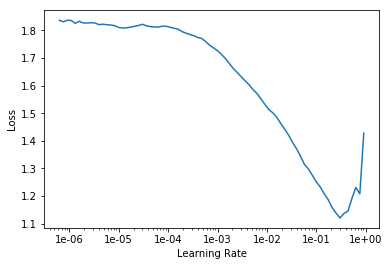

In [62]:
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

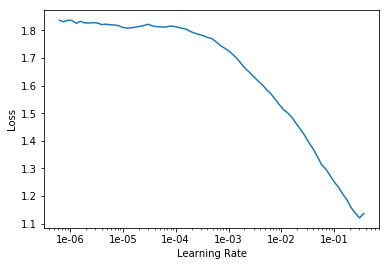

In [63]:
learn_cls.recorder.plot(skip_end=10)

In [80]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('bhai_subword_cls')

epoch,train_loss,valid_loss,accuracy,time
0,0.794400,0.394550,0.891967,01:54
1,0.452886,0.163123,0.958449,02:05


In [81]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_subword_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.318727,0.206995,0.947368,02:05
1,0.236387,0.151577,0.955679,02:13


In [22]:
learn_cls.load('bhai_subword_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_subword_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.159545,0.110050,0.966759,02:38
1,0.135944,0.120207,0.966759,02:26


In [23]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_subword_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.065800,0.141450,0.961219,02:49
1,0.077396,0.114537,0.969529,02:50
2,0.074074,0.112849,0.969529,03:02
3,0.070591,0.102635,0.969529,02:50


In [27]:
pred,targ = testing(aa2/'ulm_test.csv')

300
Accuracy: 
0.9533333333333334
[('rg', 'mk'), ('rn', 'ij'), ('ij', 'rn'), ('rg', 'rn'), ('rn', 'mk'), ('rg', 'mk'), ('rn', 'ij'), ('rg', 'ij'), ('hm', 'mk'), ('fe', 'rn'), ('fe', 'mk'), ('fe', 'mk'), ('rn', 'mk'), ('rg', 'rn')]


In [28]:
from sklearn.metrics import f1_score
# y_true = [0, 1, 2, 0, 1, 2]
# y_pred = [0, 2, 1, 0, 0, 1]
# output : array([ 0.8,  0. ,  0. ])
# Which is the scores for each class.
out  = f1_score(targ, pred, average=None)
out2 = f1_score(targ, pred, average='macro')
out3 = f1_score(targ, pred, average='weighted')
out, out.mean() ,out2, out3

(array([0.969072, 0.989899, 0.960784, 0.934579, 0.947368, 0.92    ]),
 0.9536172214796502,
 0.9536172214796502,
 0.9536172214796503)